# Exploratory Analysis to Find Trends in Average Movie Ratings for different Genres

<h2>Dataset</h2>

<ol>
<li>The IMDB Movie Dataset (MovieLens 10M) is used for the analysis.</li>
<li>This dataset contains 10 million ratings and 465,000 tag applications applied to 27,000 movies by 138,000 users and was released in 4/2015.</li>
<li>The csv files movies.csv and ratings.csv are used for the analysis.</li>
</ol>

<h2>Motivation</h2>

● Understand the trend in average ratings for different movie genres over years (from 1995 to 2015) and Correlation between the trends for different genres (8 different genres are considered: Animation, Comedy, Romance, Thriller, Horror, Sci-Fi and Musical).

● This will give us an insight about how the people’s liking for the different movie genres change over time and about the strength of association between trends in between different movie genres, insights possibly useful for the critics.

## Preprocessing

In [19]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,5)
movies = pd.read_table('/Users/nirmal/Downloads/ml-10M100K/movies.dat', header=None, delimiter='::')

/Users/nirmal/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [20]:
movies.columns = ['movie_id', 'title', 'genres']
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


##### converting multiple genres in single row into multiple rows containing single genre

In [21]:
exploded_df = list()
for i, row in movies.iterrows():
    for col in row['genres'].split('|'):
        exploded_df.append([row['movie_id'], row['title'], col])
exploded_df = pd.DataFrame(exploded_df)
exploded_df.columns = ['movie_id', 'title', 'genre']
exploded_df.head(5)

,movie_id,title,genre
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy


#### A grouping of top 10 genres by movie count in this dataset. We will limit this analysis to the top 8 genres for now

In [22]:
exploded_df['genre'].value_counts()

Drama                 5339
Comedy                3703
Thriller              1706
Romance               1685
Action                1473
Crime                 1118
Adventure             1025
Horror                1013
Sci-Fi                 754
Fantasy                543
Children               528
War                    511
Mystery                509
Documentary            482
Musical                436
Animation              286
Western                275
Film-Noir              148
IMAX                    29
(no genres listed)       1
Name: genre, dtype: int64

In [23]:
ratings = pd.read_table('/Users/nirmal/Downloads/ml-10M100K/ratings.dat', header=None, delimiter='::')

/Users/nirmal/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [24]:
ratings.columns = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings.head(10)

,user_id,movie_id,rating,unix_timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392
5,1,329,5.0,838983392
6,1,355,5.0,838984474
7,1,356,5.0,838983653
8,1,362,5.0,838984885
9,1,364,5.0,838983707


In [25]:
ratings['year'] = ratings['unix_timestamp'].apply(lambda x: datetime.fromtimestamp(x).year)
ratings.head(10)

,user_id,movie_id,rating,unix_timestamp,year
0,1,122,5.0,838985046,1996
1,1,185,5.0,838983525,1996
2,1,231,5.0,838983392,1996
3,1,292,5.0,838983421,1996
4,1,316,5.0,838983392,1996
5,1,329,5.0,838983392,1996
6,1,355,5.0,838984474,1996
7,1,356,5.0,838983653,1996
8,1,362,5.0,838984885,1996
9,1,364,5.0,838983707,1996


In [26]:
merged_df = pd.merge(ratings, exploded_df, left_on=['movie_id'], right_on=['movie_id'], how='left')
merged_df.head(10)

,user_id,movie_id,rating,unix_timestamp,year,title,genre
0,1,122,5.0,838985046,1996,Boomerang (1992),Comedy
1,1,122,5.0,838985046,1996,Boomerang (1992),Romance
2,1,185,5.0,838983525,1996,"Net, The (1995)",Action
3,1,185,5.0,838983525,1996,"Net, The (1995)",Crime
4,1,185,5.0,838983525,1996,"Net, The (1995)",Thriller
5,1,231,5.0,838983392,1996,Dumb & Dumber (1994),Comedy
6,1,292,5.0,838983421,1996,Outbreak (1995),Action
7,1,292,5.0,838983421,1996,Outbreak (1995),Drama
8,1,292,5.0,838983421,1996,Outbreak (1995),Sci-Fi
9,1,292,5.0,838983421,1996,Outbreak (1995),Thriller


### Distribution of Ratings in dataset across genres

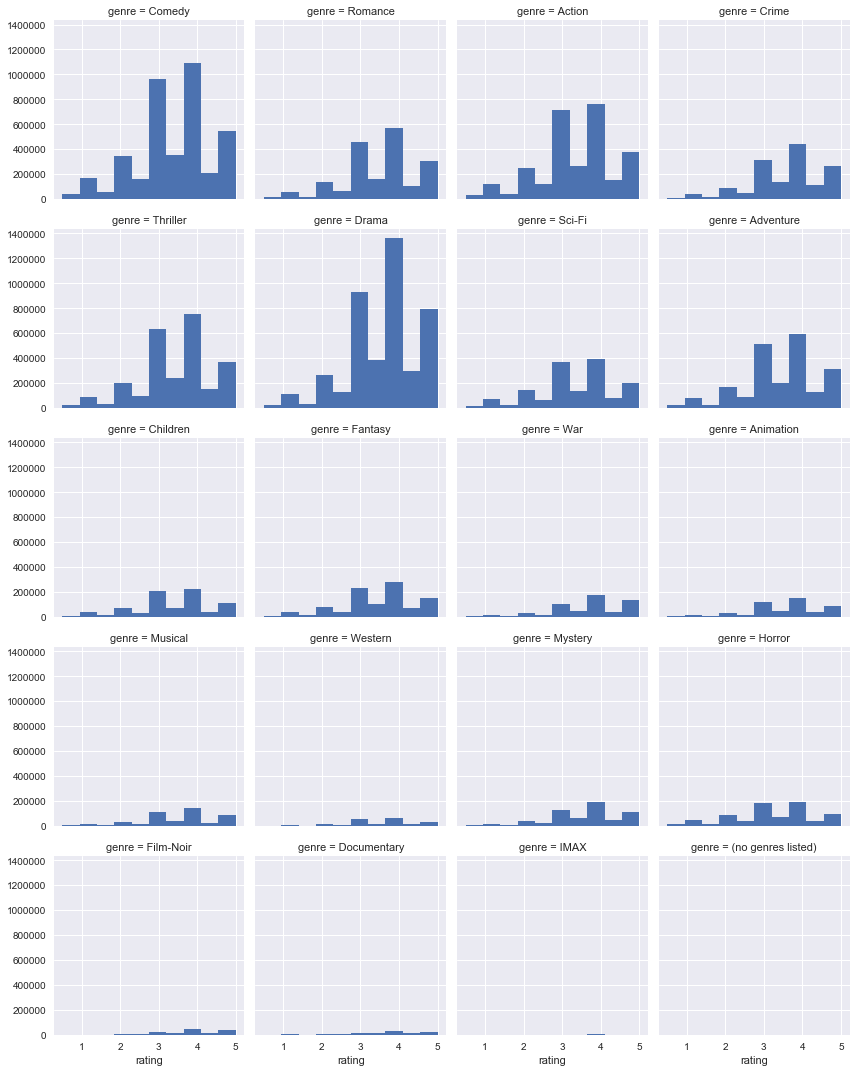

In [28]:
plt.rcParams['figure.figsize'] = (15,5)
g = sns.FacetGrid(merged_df, col='genre', col_wrap=4)
g.map(plt.hist, 'rating')


#### There seem to be enough data points only for the top 8 genres, and we will analyze only these genres going forward

In [29]:
filtered_genres = (
    'Comedy',
    'Romance',
    'Action',
    'Crime',
    'Thriller',
    'Drama',
    'Sci-Fi',
    'Adventure'
)
filtr = merged_df['genre'].apply(lambda x: x in filtered_genres)
merged_df = merged_df[filtr]

In [30]:
plt.rcParams['figure.figsize'] = (15,15)
average_rating_by_genre_by_year = merged_df.groupby(['year', 'genre']).agg(['mean'])['rating']['mean'].unstack()

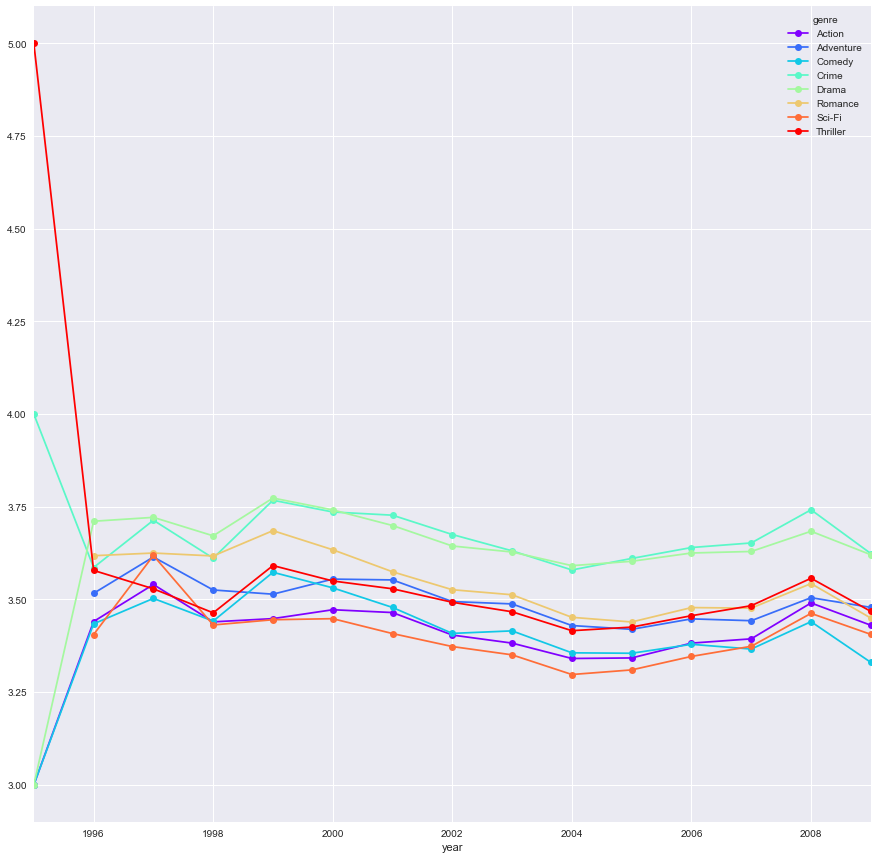

In [31]:
average_rating_by_genre_by_year.plot(kind='line', marker='o', cmap=plt.cm.rainbow)

#### This is a plot of average movie ratings across years for each genre. Notice that ratings across genres are highly corellated, i.e. ratings across genres tend rise higher or lower together. 

#### This trend might also add weight to the idea that ratings for a movie tend to be relative, and people rate movies by comparing ratings for other movies released around similar times, i.e. ratings are not an absolute measure but rather a measure of how good a movie is compared to its peers around released around the same time.

#### Movies on the Crime and Drama genres tend to generally have the highest average ratings whereas movies on the SciFi, Action and Comedy genres tend to have the lowest ratings

In [32]:
average_ratings_by_user_by_genre = merged_df.groupby(['user_id','year','genre'], as_index=False).agg(['mean'])['rating']['mean']
average_ratings_by_user_by_genre = pd.DataFrame(average_ratings_by_user_by_genre).reset_index()

In [33]:
batch_1 = range(1996, 2001)
batch_2 = range(2001, 2006)
batch_3 = range(2006, 2011)

batch_1_filter = average_ratings_by_user_by_genre['year'].apply(lambda x: x in batch_1)
average_ratings_batch_1 = average_ratings_by_user_by_genre[batch_1_filter]

batch_3_filter = average_ratings_by_user_by_genre['year'].apply(lambda x: x in batch_3)
average_ratings_batch_3 = average_ratings_by_user_by_genre[batch_3_filter]

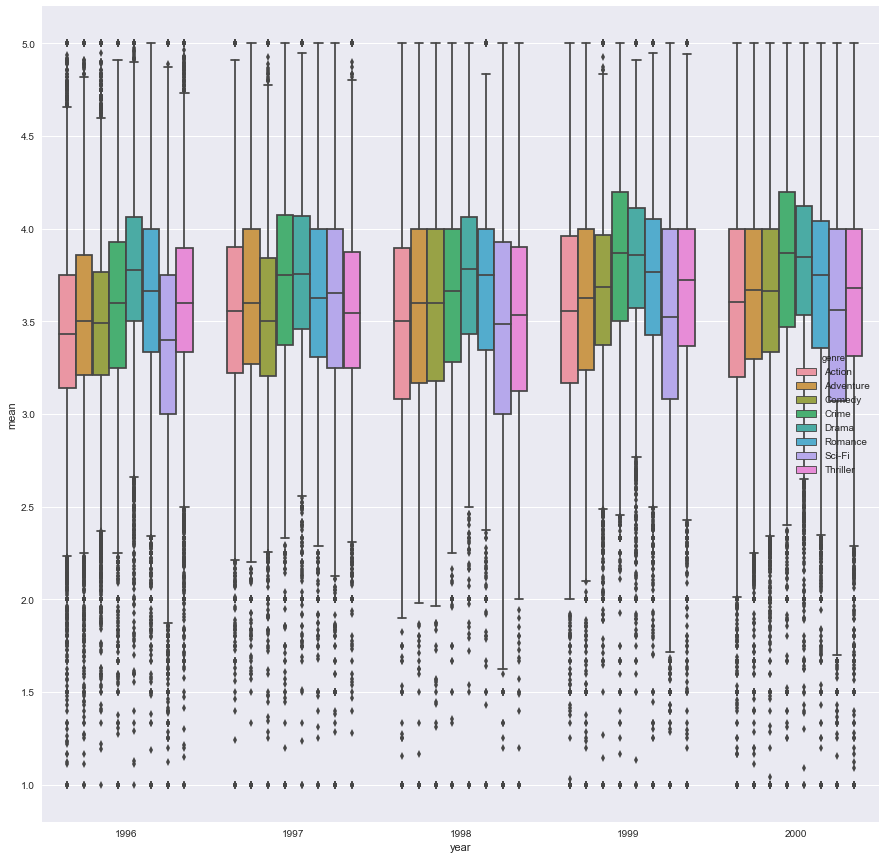

In [34]:
sns.boxplot(x=average_ratings_batch_1['year'], y=average_ratings_batch_1['mean'], hue=average_ratings_batch_1['genre'])

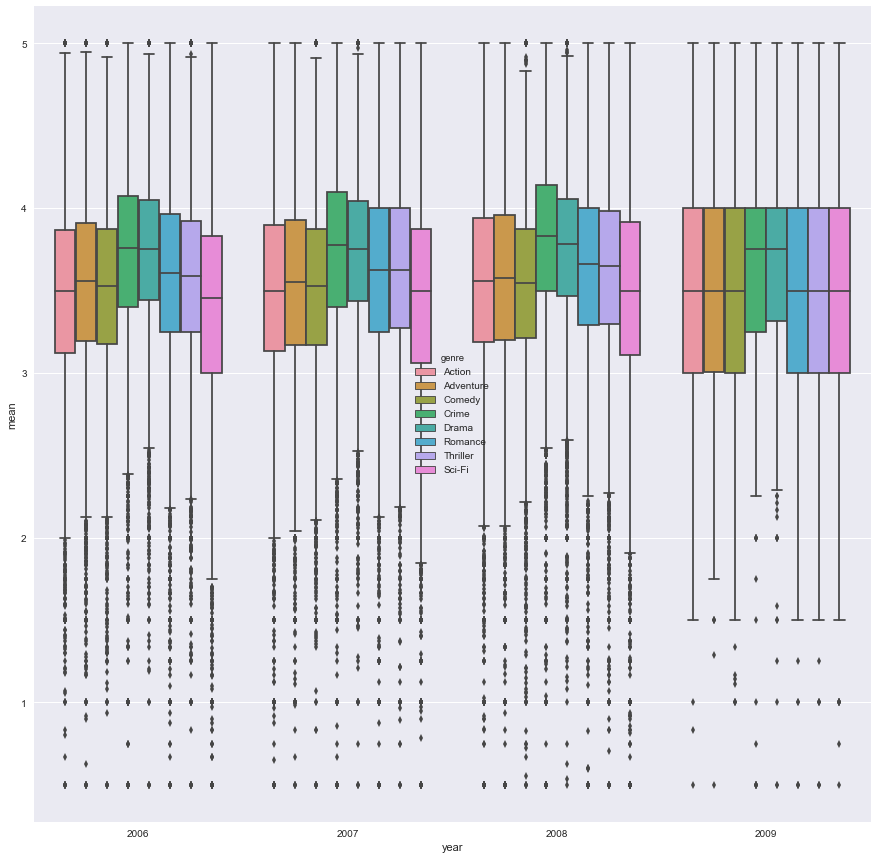

In [35]:
sns.boxplot(x=average_ratings_batch_3['year'], y=average_ratings_batch_3['mean'], hue=average_ratings_batch_3['genre'])

#### By looking at the boxplots for average ratings given by user across years, one thing that does stand out is that the 25% quartile rating seems to have fallen from an average of 2.5 in 1995 to  2 or lower by 2008

# Summmary

#### 1. Ratings across genres are highly corellated, i.e. ratings across genres tend rise higher or lower together. This can further be established by looking at the pearson corelation for trends between ratings for any two sets of genres

#### Notice that there is a high correlation (>0.5) at a very low significance value (p_value) = 0, which means that the correlation is indeed very strong

In [51]:
corr_df = merged_df.groupby(['user_id','year','genre'], as_index=False).agg(['mean'])['rating']['mean'].unstack().reset_index()

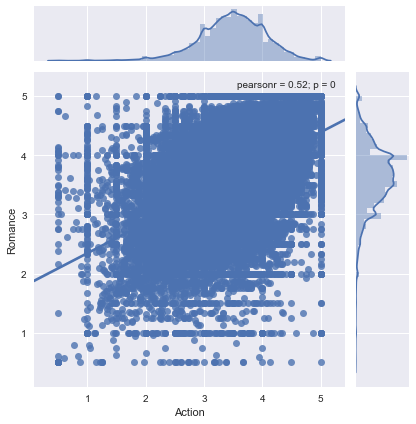

In [54]:
sns.jointplot(corr_df['Action'],corr_df['Romance'], kind='reg')

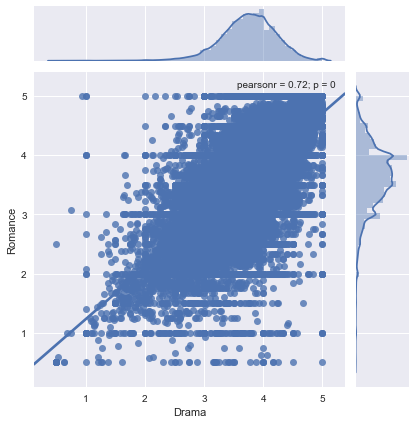

In [55]:
sns.jointplot(corr_df['Drama'],corr_df['Romance'], kind='reg')

#### 2. Movies on the Crime and Drama genres tend to generally have the highest average ratings whereas movies on the SciFi, Action and Comedy genres tend to have the lowest ratings

#### 3. Average ratings for any genre of movie has fallen from 1996 to 2008